<a href="https://colab.research.google.com/github/snufkin92/colab_tutorial/blob/master/section_07/pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ●プーリングの実装
im2colを使ってプーリングを実装します。

## ●プーリングの実装
im2colを使って、プーリングを実装します。  
今回は、scikit-learnから手書き文字の画像を読み込み、畳み込みを行います。

(1797, 64)


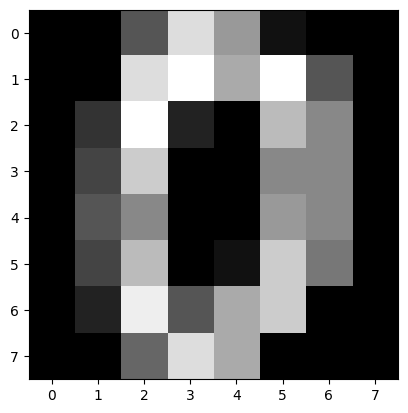

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
print(digits.data.shape)

image = digits.data[0].reshape(8, 8)
plt.imshow(image, cmap="gray")
plt.show()

今回は、以下のストライドを導入したim2colの関数を使います。  
フィルタがかかる領域は、今回はプーリングの領域となります。  

In [11]:
def im2col(img, flt_h, flt_w, out_h, out_w, stride):  # 入力画像、プーリング領域の高さ、幅、出力画像の高さ、幅、ストライド

    cols = np.zeros((flt_h*flt_w, out_h*out_w)) # 生成される行列のサイズ

    for h in range(out_h):
        h_lim = stride*h + flt_h  # h:プーリング領域の上端、h_lim:プーリング領域の下端
        for w in range(out_w):
            w_lim = stride*w + flt_w  # w:プーリング領域の左端、w_lim:プーリング領域の右端
            cols[:, h*out_w+w] = img[stride*h:h_lim, stride*w:w_lim].reshape(-1)

    return cols

im2colで画像を行列に変換し、フィルタとの行列積によりプーリングを行います。

In [12]:
print(digits.data[0].reshape(8, 8))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


(4, 16)
im2col=[[ 0.  5.  9.  0.  0. 15.  0.  8.  0.  8.  0.  8.  0. 14. 10.  0.]
 [ 0. 13.  1.  0.  3.  2. 11.  0.  5.  0.  9.  0.  2.  5. 12.  0.]
 [ 0. 13. 10.  5.  0. 12.  0.  8.  0. 11.  1.  7.  0.  6. 10.  0.]
 [ 0. 15. 15.  0.  4.  0.  8.  0.  4.  0. 12.  0.  0. 13.  0.  0.]]
(16,)
max_pooling=[ 0. 15. 15.  5.  4. 15. 11.  8.  5. 11. 12.  8.  2. 14. 12.  0.]
(4, 4)
reshape=[[ 0. 15. 15.  5.]
 [ 4. 15. 11.  8.]
 [ 5. 11. 12.  8.]
 [ 2. 14. 12.  0.]]


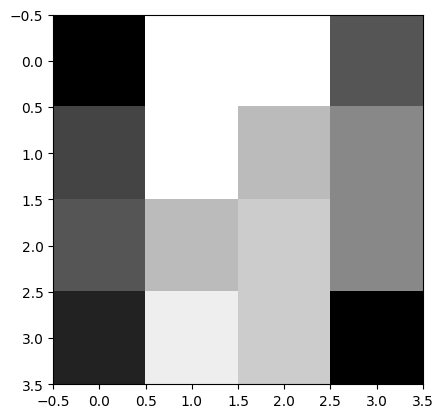

In [13]:
img_h, img_w = image.shape  # 入力画像の高さ、幅
pool = 2  # プーリング領域のサイズ

out_h = img_h//pool  # 出力画像の高さ
out_w = img_w//pool  # 出力画像の幅

cols = im2col(image, pool, pool, out_h, out_w, pool)
print(cols.shape)
print(f"im2col={cols}")

image_out = np.max(cols, axis=0)  # Maxプーリング
print(image_out.shape)
print(f"max_pooling={image_out}")

image_out = image_out.reshape(out_h, out_w)
print(image_out.shape)
print(f"reshape={image_out}")

plt.imshow(image_out, cmap="gray")
plt.show()

各2x2の領域の最大値が抽出され、新たな画像となりました。  
8x8の画像が、4x4の画像に変換されたことになります。
